# Algoritmos de agrupamento 
* Kmeans
* Cluster Hierárquico
* GMM
* DBScan

### Bibliotecas 

In [33]:
### Libs auxiliares
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets

### Modelos ####
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA

### Base (iris)
* Gerando kmeans com 15 clusters e apenas 3 iteração, cujo os centroides serão utilizados na inicialização dos próximos códigos

In [42]:
iris = datasets.load_iris()

dados = iris.data
y = iris.target

# scaler = StandardScaler()
# dados = pd.DataFrame(scaler.fit_transform(dados))


kmeans = KMeans(n_clusters=20, max_iter=1,init='k-means++', n_init=10, random_state=42)
kmeans.fit(dados)

centroides = kmeans.cluster_centers_

### Kmeans

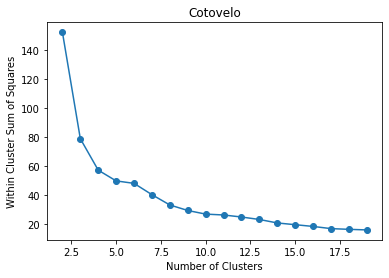

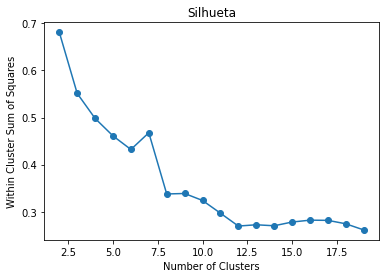

,score_wss,silhueta
2,152.3,0.6810
3,78.9,0.5512
4,57.2,0.4981
5,49.8,0.4610
6,48.1,0.4322
7,40.3,0.4677
8,33.2,0.3378
9,29.4,0.3388
10,26.9,0.3240
11,26.3,0.2970


In [11]:
k_values = range(2,20)
first=True
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=10,init=centroides[0:k,:], n_init=1, random_state=32)
    cluster_labels = kmeans.fit_predict(dados)
    score_wss = round(kmeans.inertia_ ,1)
    silhueta = round(silhouette_score(dados, cluster_labels),4)
    resultados_aux = {'score_wss': score_wss, 'silhueta': silhueta}
    resultados_aux = pd.DataFrame(resultados_aux, index = [k])
    if first == True:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux],axis =0)

plt.plot(resultados_final.index,resultados_final.score_wss,marker='o')        
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Cotovelo')
plt.show()

plt.plot(resultados_final.index,resultados_final.silhueta,marker='o')  
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Silhueta')
plt.show()

resultados_final

In [12]:
# Verificando os centróides finais
# Selecionando 3 clusters

KM_final = KMeans(n_clusters = 3, init = centroides[0:3,:], n_init = 1, max_iter=20, random_state=42)

KM_final.fit(dados)
clusters_labels = KM_final.predict(dados)

print ('Centroides: ', KM_final.cluster_centers_)
print ('\nInertia ou WCSS: ',KM_final.inertia_)
print ('\nClusters preditos: ' , clusters_labels)

Centroides:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Inertia ou WCSS:  78.8556658259773

Clusters preditos:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [19]:
# Matriz cruzada 

pd.crosstab(y, clusters_labels,margins=True, margins_name="Total")

# Verificando acurácia do agrupamento
# é necessário renomear os labels para verificar acurácia corretamente

# from sklearn.metrics import  confusion_matrix, accuracy_score

# clusters_labels[clusters_labels < 1] = 3
# clusters_labels[clusters_labels == 1] = 0
# clusters_labels[clusters_labels == 3] = 1


# accuracy_score(y, clusters_labels)

col_0,0,1,2,Total
row_0,,,,
0,0,50,0,50
1,3,0,47,50
2,36,0,14,50
Total,39,50,61,150


In [ ]:
# Necessário ler os dados e se tiver os centróides iniciais
# centroides iniciais (init)
# numero de iterações definidas (max_iter)
# numero de inicializações definidas (n_init = 10 é o default)

# definecentroides = pd.read_csv("definecentroides.csv",sep = ",")
# dados =  pd.read_csv("dados_agrupamento.csv", sep= ",")
# c = definecentroides.as_matrix()


# K = 12
# sil = []
# for i in range(2, K+1):
#     km = KMeans(init= c[0:i,1:],  n_clusters=i, max_iter=10) 
#     Y = km.fit_predict(dados)
#     sil.append(silhouette_score(dados, Y))

# plt.ylim([0,1])
# plt.xlim([1,K+1])
# plt.plot(range(2, K+1), sil, 'xb-')

# clf = KMeans(init= c[0:5,1:] ,n_clusters=5, max_iter=10) 
# clf.fit_predict(dados)
# print(clf.cluster_centers_)

# Cluster hierárquico

* Single linkage (Vizinho Mais Próximo). A distância entre os clusters é definida pela distância entre seus membros mais próximos.

* Complete linkage (Vizinho mais distante). A distância entre clusters é definida pela distância entre seus membros mais distantes. Este método é computacionalmente caro.

* Average linkage (Método de Grupo de Pares Não Ponderados com Média Aritmética). A porcentagem do número de pontos de cada cluster é calculada em relação ao número de pontos dos dois clusters se eles foram mesclados.

* Weighted linkage (Método de Grupo de Pares Ponderados com Média Aritmética). Os pontos individuais dos dois clusters contribuem para a distância agregada entre um cluster menor e um cluster maior.

* Centroid linkage (Método de Grupo de Pares Não Ponderados usando Centroides). Um ponto definido pela média de todos os pontos (centroid) é calculado para cada cluster e a distância entre clusters é a distância entre seus respectivos centróides.

* Ward linkage (Aumento Mínimo da Soma dos Quadrados). Ele especifica a distância entre dois clusters, calcula o erro da soma dos quadrados (ESS) e escolhe sucessivamente os próximos clusters com base no ESS menor. O Método de Ward busca minimizar o aumento da ESS a cada etapa.

In [43]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(dados))
X_scaled.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

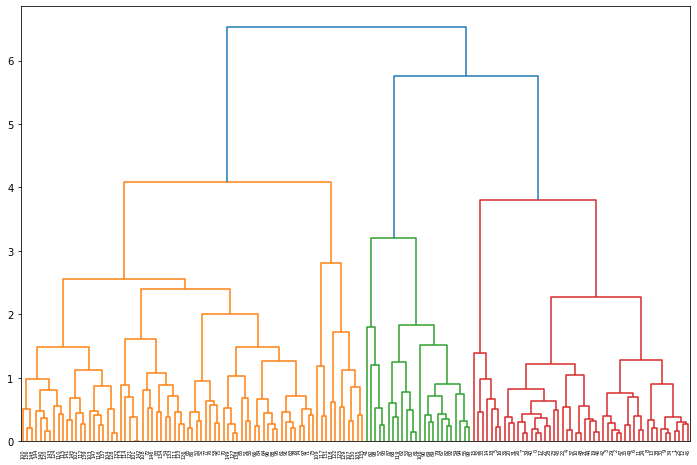

In [44]:
plt.figure(figsize=(12,8))
hierarchy.dendrogram(hierarchy.linkage(X_scaled, metric = "euclidean", method = "complete"), )
plt.show()

In [45]:
HC = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             memory=None, 
                             connectivity=None, 
                             compute_full_tree='auto', 
                             linkage='ward')

HC.fit(X_scaled)
cl_labels = HC.fit_predict(X_scaled)
cl_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Ward')

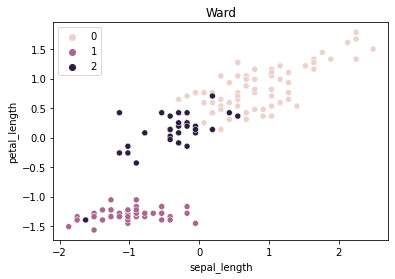

In [49]:
sns.scatterplot(x=X_scaled['sepal_length'], 
                y=X_scaled['petal_length'], 
                data=X_scaled, 
                hue=cl_labels).set_title('Ward')

In [18]:
pd.crosstab(y, cl_labels, margins=True, margins_name="Total")

# Verificando acurácia do agrupamento
# É necessário renomear os labels para verificar acurácia corretamente

# cl_labels[cl_labels < 1] = 3
# cl_labels[cl_labels == 1] = 0
# cl_labels[cl_labels == 3] = 1


# accuracy_score(y, cl_labels)

col_0,0,1,2,Total
row_0,,,,
0,0,49,1,50
1,23,0,27,50
2,48,0,2,50
Total,71,49,30,150


In [21]:
linkage = ["single", "complete", "average", "ward"]

for i in linkage:
    hc_fit = AgglomerativeClustering(n_clusters = 3, linkage = i)
    hc_fit.fit(X_scaled)
    name_column = "hc_" + i
    X_scaled[name_column] = hc_fit.labels_

X_scaled.head()    

,0,1,2,3,hc_single,hc_complete,hc_average,hc_ward
0,-0.900681,1.019004,-1.340227,-1.315444,2,1,1,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2,1,1,1
2,-1.385353,0.328414,-1.397064,-1.315444,2,1,1,1
3,-1.506521,0.098217,-1.283389,-1.315444,2,1,1,1
4,-1.021849,1.249201,-1.340227,-1.315444,2,1,1,1


# GMM

In [50]:
GMM = GaussianMixture(n_components=3, 
                       covariance_type='full', 
                       tol=0.001, 
                       reg_covar=1e-06, 
                       max_iter=100, 
                       n_init=1, 
                       init_params='kmeans', 
                       weights_init=None, 
                       means_init=None, 
                       precisions_init=None, 
                       random_state=None, 
                       warm_start=False, 
                       verbose=0, 
                       verbose_interval=10)

GMM.fit(dados)
clust_labels = GMM.predict(dados)
clust_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
pd.crosstab(y, clust_labels, margins=True, margins_name="Total")

col_0,0,1,2,Total
row_0,,,,
0,0,50,0,50
1,5,0,45,50
2,50,0,0,50
Total,55,50,45,150


# DBScan

In [81]:
DB = DBSCAN(eps=0.5, 
            min_samples=10, 
            metric='euclidean', 
            metric_params=None, 
            algorithm='auto', 
            leaf_size=30, 
            p=None, 
            n_jobs=1)

DB.fit(dados)
c_labels = DB.fit_predict(dados)
c_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [82]:
pd.crosstab(y, c_labels, margins=True, margins_name="Total")

col_0,-1,0,1,Total
row_0,,,,
0,2,48,0,50
1,6,0,44,50
2,22,0,28,50
Total,30,48,72,150
